# Intro to Data Science @ SzISz Part II.
## Data discovery

### Table of contents
- <a href="#What-is-Data-Discovery?">Theory</a>
- <a href="#Let's-do-it-then!">Action I.</a>
- <a href="#What-about-this-dataset?">Action II.</a>
- <a href="#More-data!">Action III.</a>


### What is Data Discovery?
Data discovery is the process in which one looks into data and tries to:
- figure out what is interesting in the data
- what (s)he can do with it
- if it needs extensive preprocessing

From <a href="https://en.wikipedia.org/wiki/Data_discovery#Definition">Wikipedia</a>:
> Data Discovery is a user-driven process of searching for patterns or specific items in a data set.
> Data Discovery applications use visual tools such as geographical maps, pivot-tables, and heat-maps
> to make the process of finding patterns or specific items rapid and intuitive. Data Discovery may 
> leverage statistical and data mining techniques to accomplish these goals.

### Why is it important?
To speed up the whole process by giving you insights about:
- if the data can be used at all
- the necessary preprocessing steps
- the possible algorithms
- the interesting data points

### Tools
Everything. Two important factor:
- speed __->__ base statistics
- ease of understanding __->__ PLOTS-PLOTS-PLOTS!

### Let's do it then!
Given the data in `'../data/misterious.csv'`. Read it with `pandas.read_csv`, and then plot it, using the `pandas.DataFrame`'s `plot` method (hint: use shift-tab inside the brackets). You can try `pandas.DataFrame`'s `describe` as well.

#### Answer the following questions:
- What question should we ask?
- What can be the task to solve?
- How?
- Is anything interesting showed up?
- What should we do as the first step of preprocessing?

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/misterious.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
plt.c

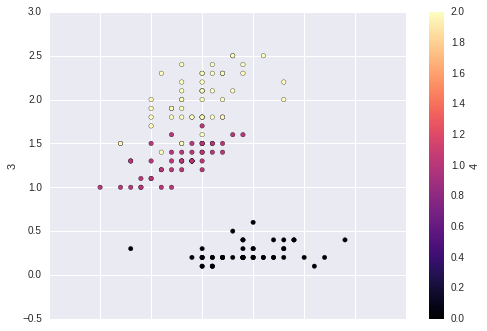

In [20]:
df.plot(1, 3, kind='scatter', c=4, colormap='magma')

### Plot every feature against each other!
hints: 
- <a href="http://matplotlib.org/examples/pylab_examples/subplots_demo.html">`subplots`</a>
- <a href="http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html">`scatterplots`</a>

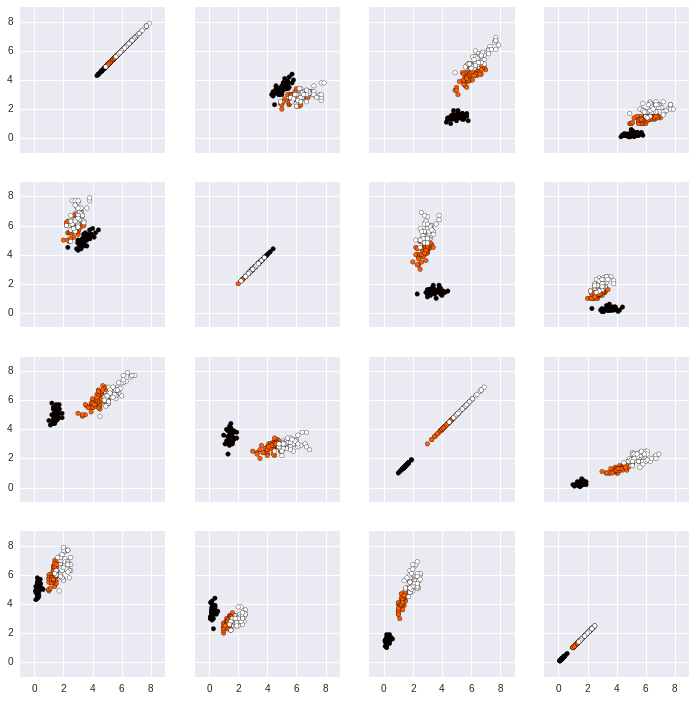

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=4, sharex="col", sharey="row", figsize=(12,12))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.scatter(df[i], df[j], c=df[4], cmap='hot')

fig.show()

### What was the data about?
Let's <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" style="color: black; text-decoration: none; cursor: default;">find out</a>! This time use the data file `'../data/i.csv'`.<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html" style="color: white; text-decoration: none; cursor: default;">.. or just use this :D</a>
- use `sklearn`'s <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">`DecisionTree`</a> on it:
   - import sklearn's DecisionTree model!
   - read the data
   - init the model
   - fit the model
   - transform data
   - display the resulting tree (see: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html">export_graphviz</a> then <a href="http://www.webgraphviz.com/">this tool</a>, result should be similar to <a href="http://scikit-learn.org/stable/_images/iris.svg">this</a>)

In [36]:
from sklearn.datasets import load_iris

In [39]:
data = load_iris()

#### Story time: scikit-learn's interface

The `fit`-`transform`-`predict` principle:

Every sklearn object has a `fit` method, and depending on the object's function  
a __`transform`__ (+`fit_transform`)  
or a __`predict`__ (+`fit_predict`) method.

For example:
```python
clf = DecisionTreeClassifier()
clf.fit(X, y)
y_hat = clf.predict(X)
```
Where:
- `X` is always the input data  
- `y` is the target data

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [46]:
clf = DecisionTreeClassifier(random_state=42)

In [47]:
clf.fit(df[[0, 1, 2, 3]], df[4])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [49]:
y_hat = clf.predict(df[[0, 1, 2, 3]])

In [57]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 

In [63]:
from IPython.display import Image  
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
print dot_data.getvalue()

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<petal length (cm) &le; 2.45<br/>gini = 0.6667<br/>samples = 150<br/>value = [50, 50, 50]<br/>class = setosa>, fillcolor="#e5813900"] ;
1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]<br/>class = setosa>, fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]<br/>class = versicolor>, fillcolor="#39e58100"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]<br/>class = versicolor>, fillcolor="#39e581e5"] ;
2 -> 3 ;
4 [label=<petal width (cm) &le; 1.65<br/>gini = 0.0408<br/>samples = 48<br/>value = [0, 47, 1]<br/>class = versicolor>, fillcolor="#39e581fa"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 47<br/>value 

---

### What about this dataset?
No misteries this time. Let's use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html">20 news groups</a> dataset!

#### Questions:
- What can we see from the raw data?
- What should we do with it?
- How can we visualize the data?
- What question should we answer from this?

In [84]:
from collections import Counter
from sklearn.datasets import fetch_20newsgroups

In [66]:
newsgroups_train = fetch_20newsgroups(
    subset='train', 
    categories=['sci.space', 'talk.politics.guns',
                'rec.motorcycles', 'misc.forsale'])

In [106]:
to_strip = ' .,:;><!?-#&'

def strip(word):
    for char in to_strip:
        word = word.replace(char, '')
    return word

def extract(text):
    text = [strip(word.lower()) for word in text.split()]
    text = Counter([word for word in text if len(word) > 3])
    text = [tuple(wordcnt) for wordcnt in text.iteritems()]
    text = sorted(text, key=lambda (word, count): count, reverse=True)
    text = text[:10]
    return [word for (word, count) in text]

In [107]:
print newsgroups_train.data[0]

From: msb@sq.sq.com (Mark Brader)
Subject: Re: Comet in Temporary Orbit Around Jupiter?
Organization: SoftQuad Inc., Toronto, Canada
Lines: 34

> > Can these questions be answered for a previous
> > instance, such as the Gehrels 3 that was mentioned in an earlier posting?

> Orbital Elements of Comet 1977VII (from Dance files)
> p(au)          3.424346
> e              0.151899
> i              1.0988
> cap_omega(0) 243.5652
> W(0)         231.1607
> epoch       1977.04110

Thanks for the information!

I assume p is the semi-major axis and e the eccentricity.  The peri-
helion and aphelion are then given by p(1-e) and p(1+e), i.e., about
2.90 and 3.95 AU respectively.  For Jupiter, they are 4.95 and 5.45 AU.
If 1977 was after the temporary capture, this means that the comet
ended up in an orbit that comes no closer than 1 AU to Jupiter's --
which I take to be a rough indication of how far from Jupiter it could
get under Jupiter's influence.

> Also, perihelions of Gehrels3 were:
> 
> A

In [111]:
X = [extract(text) for text in newsgroups_train.data]
y = newsgroups_train.target

In [113]:
zip(X[:10], y[:10])

[([u'jupiter',
   u'that',
   u'comet',
   u'radii',
   u'softquad',
   u"jupiter's",
   u'from',
   u'toronto',
   u'this',
   u'figure'],
  2),
 ([u'defense',
   u'army',
   u'there',
   u'that',
   u'comm',
   u'they',
   u'space',
   u'organization',
   u'accessdigexnet',
   u'agency'],
  2),
 ([u'tire',
   u'only',
   u'should',
   u'mitre',
   u'dean',
   u'corp',
   u'about',
   u'getting',
   u'road',
   u'tread'],
  1),
 ([u'appears)',
   u'art)',
   u'(1st',
   u'appear)',
   u'liefeld',
   u'annual',
   u'(wolverine',
   u'(rob',
   u'(punisher',
   u'(keown'],
  0),
 ([u'that',
   u'tcdd3',
   u'with',
   u'have',
   u'been',
   u'machine',
   u'someone',
   u'sony',
   u'some',
   u'what'],
  0),
 ([u'vinyl',
   u'from',
   u'list',
   u'thank',
   u'arthur_noguerola@vosstratuscom',
   u'metal',
   u'records',
   u'sale',
   u'heavy',
   u'usa)'],
  0),
 ([u'murli',
   u'386/25',
   u'ohio',
   u'486/25',
   u'daughterboard)',
   u'zeos',
   u'university',
   u'(zeos',
   

# HOME WORK:

1. Get the top words of the top words in the different categories. 
2. Get the overall top words in the different categories.
3. Get the overall top words of the top words.
4. Get the overal top words.

In [ ]:
# TODO!

### How should we represent texts? aka. Basics of Text Mining

#### Create document vectors!
- Split the documents into words
- Count the occurences
- Each word is a feature -> We've got a vector!

#### Write a function which returns the document as a list of words!

### There must be a better way of doing this!

`Scikit-learn` is here to save the day again (this won't be the last time!):  
Let's use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html">`sklearn.feature_extraction.text.CountVectorizer`</a>

### Let's try to analyze/visualize the documents this time!

But before, check that matrix's shape!  
What should we do? (hint: docstring!)

To visualize, use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">`t-SNE`</a> method!

---

### More data!

Let's look into our first <a href="https://www.kaggle.com/c/job-salary-prediction">kaggle dataset</a> and find out as much as we can!